In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from numpy import array
from PIL import Image


def ft_load(path: str) -> array:
    """loads a image on an array and returns it

    Args:
        path (str): path where image is

    Returns:
        np.array: image
    """
    try:
        img = plt.imread(path)
        print(f"The shape of image is: {img.shape}")
        return img
    except Exception as e:
        print(f"Error: {e}")

The shape of image is: (768, 1024, 3)
new shape: (768, 1024)


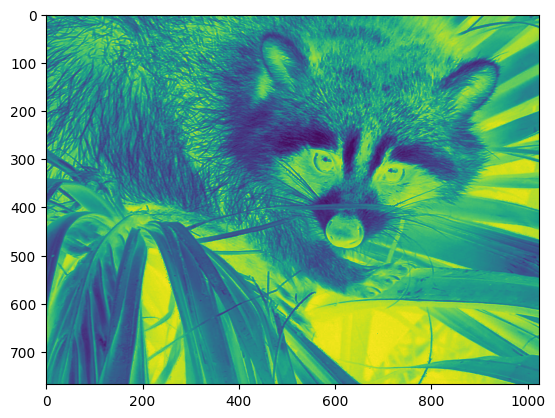

In [4]:
path = "ex03/animal.jpeg"
img = ft_load(path)
img_pil = Image.fromarray((img * 255).astype(np.uint8))  # Converte para uint8 se necessário
img_gray = img_pil.convert('L')
img_gray_array = np.array(img_gray)
plt.imshow(img_gray_array)
print(f"new shape: {img_gray_array.shape}")

In [ ]:
with Image.open(path) as image:
    image.load()
gray_image = image.convert('L')
gray_image.show()

Abrindo em uma sessão de navegador existente.


In [6]:

def validate_args(lst) -> np.array:
    """validate slice_me funct arguments

    Args:
        lst (list): de argument to be validated

    Returns:
        np.array: the array from lst if validations passed, if not exit
    """
    try:
        assert isinstance(lst, list), "family param most be list type"
        array = np.array(lst)
        assert len(array.shape) == 2, "Invalid array shape"
    except Exception as e:
        print(f"Error: {e}")
        sys.exit()
    return array


def slice_me(family: list, start: int, end: int) -> list:
    """ truncates the input 2D array by slicing rows based
    on the given indices (start and end) and recalculates
    the shape after slicing

    Args:
        family (list): 2D list
        start (int): index
        end (int): index

    Returns:
        list: the list resulting from the trunc
    """
    array = validate_args(family)

    print(f"My shape is : {array.shape}")
    new_array = array[start:end]
    print(f"My new shape is : {new_array.shape}")
    return new_array.tolist()

In [ ]:
ar_img = array(gray_image)
# plt.imshow(ar_img[100:500, 450:850], cmap='gray')
gray_img_from_array = Image.fromarray(ar_img[100:500, 450:850])
gray_img_from_array.show(gray_img_from_array)

Abrindo em uma sessão de navegador existente.
